In [1]:
import tensorflow as tf
from tensorboard.backend.event_processing import event_accumulator

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
log_dir = "H_ENV_Model_Pen/Test2_MixedEnv_Exp_0/TRPO_1"

In [4]:
# Initialize an EventAccumulator to read the log directory
event_acc = event_accumulator.EventAccumulator(log_dir)
event_acc.Reload()

In [5]:
# Print available tags (scalars, histograms, images, audio, etc.)
print(event_acc.Tags())

{'images': [], 'audio': [], 'histograms': [], 'scalars': ['rollout/ep_len_mean', 'rollout/ep_rew_mean', 'time/fps', 'train/explained_variance', 'train/is_line_search_success', 'train/kl_divergence_loss', 'train/learning_rate', 'train/policy_objective', 'train/std', 'train/value_loss'], 'distributions': [], 'tensors': [], 'graph': False, 'meta_graph': False, 'run_metadata': []}


In [6]:
# Access and print scalar data for 'rollout/ep_rew_mean'
scalars = event_acc.Scalars('rollout/ep_rew_mean')
for scalar in scalars:
    print(f"Step: {scalar.step}, Value: {scalar.value}")

Step: 2048, Value: -1208.639892578125
Step: 4096, Value: -1243.3726806640625
Step: 6144, Value: -1202.2747802734375
Step: 8192, Value: -1211.8570556640625
Step: 10240, Value: -1218.7877197265625
Step: 12288, Value: -1233.0928955078125
Step: 14336, Value: -1227.8013916015625
Step: 16384, Value: -1242.886474609375
Step: 18432, Value: -1241.4053955078125
Step: 20480, Value: -1225.388916015625
Step: 22528, Value: -1230.2862548828125
Step: 24576, Value: -1219.4837646484375
Step: 26624, Value: -1216.80908203125
Step: 28672, Value: -1209.6541748046875
Step: 30720, Value: -1211.52392578125
Step: 32768, Value: -1179.5994873046875
Step: 34816, Value: -1158.98193359375
Step: 36864, Value: -1129.10400390625
Step: 38912, Value: -1118.053955078125
Step: 40960, Value: -1100.6055908203125
Step: 43008, Value: -1083.6055908203125
Step: 45056, Value: -1070.560546875
Step: 47104, Value: -1060.228515625
Step: 49152, Value: -1048.542236328125
Step: 51200, Value: -1034.8878173828125
Step: 53248, Value: -1038

In [7]:
from tensorboard.backend.event_processing import event_accumulator

def read_tensorboard_scalars(log_dir, scalar_tag):
    """
    读取TensorBoard日志文件中的指定标量标签的步数和值。

    参数：
    log_dir (str): TensorBoard日志文件目录。
    scalar_tag (str): 要读取的标量标签。

    返回：
    steps (list): 标量数据的步数。
    values (list): 标量数据的值。
    """
    # 初始化事件累加器
    event_acc = event_accumulator.EventAccumulator(log_dir)
    event_acc.Reload()

    # 获取指定标签的标量数据
    scalars = event_acc.Scalars(scalar_tag)

    # 提取步数和对应的值
    steps = [scalar.step for scalar in scalars]
    values = [scalar.value for scalar in scalars]

    return steps, values


In [8]:
# 示例用法
log_dir = "H_ENV_Model_Pen/Test2_MixedEnv_Exp_0/TRPO_1"
scalar_tag = 'rollout/ep_rew_mean'
steps, values = read_tensorboard_scalars(log_dir, scalar_tag)


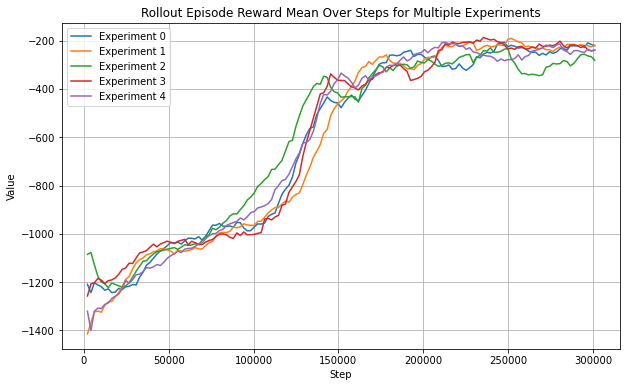

In [9]:
# 设置实验数量
exp_num = 5
scalar_tag = 'rollout/ep_rew_mean'

# 创建一个图形对象
plt.figure(figsize=(10, 6))

# 读取每个实验的数据并绘制到同一张图上
for expId in range(exp_num):
    log_dir = "H_ENV_Model_Pen/Test2_MixedEnv_Exp_" + str(expId) + "/TRPO_1"
    steps, values = read_tensorboard_scalars(log_dir, scalar_tag)
    plt.plot(steps, values, label=f'Experiment {expId}')

# 设置图形标签和标题
plt.xlabel('Step')
plt.ylabel('Value')
plt.title('Rollout Episode Reward Mean Over Steps for Multiple Experiments')
plt.legend()
plt.grid(True)

# 显示图形
plt.show()

In [19]:
# 设置实验数量
exp_num = 5
scalar_tag = 'rollout/ep_rew_mean'

# 初始化存储所有实验数据的列表
all_values = []

# 读取每个实验的数据
for expId in range(exp_num):
    log_dir = "H_ENV_Model_Pen/Test2_MixedEnv_Exp_" + str(expId) + "/TRPO_1"
    steps, values = read_tensorboard_scalars(log_dir, scalar_tag)
    all_values.append(values)

# 将所有实验的值转换为NumPy数组以便于计算
all_values = np.array(all_values)

# 计算每个步数上的平均值和标准差
mean_values = np.mean(all_values, axis=0)
std_values = np.std(all_values, axis=0)

Final Mean Value: -240.23
Final Standard Deviation: 22.44


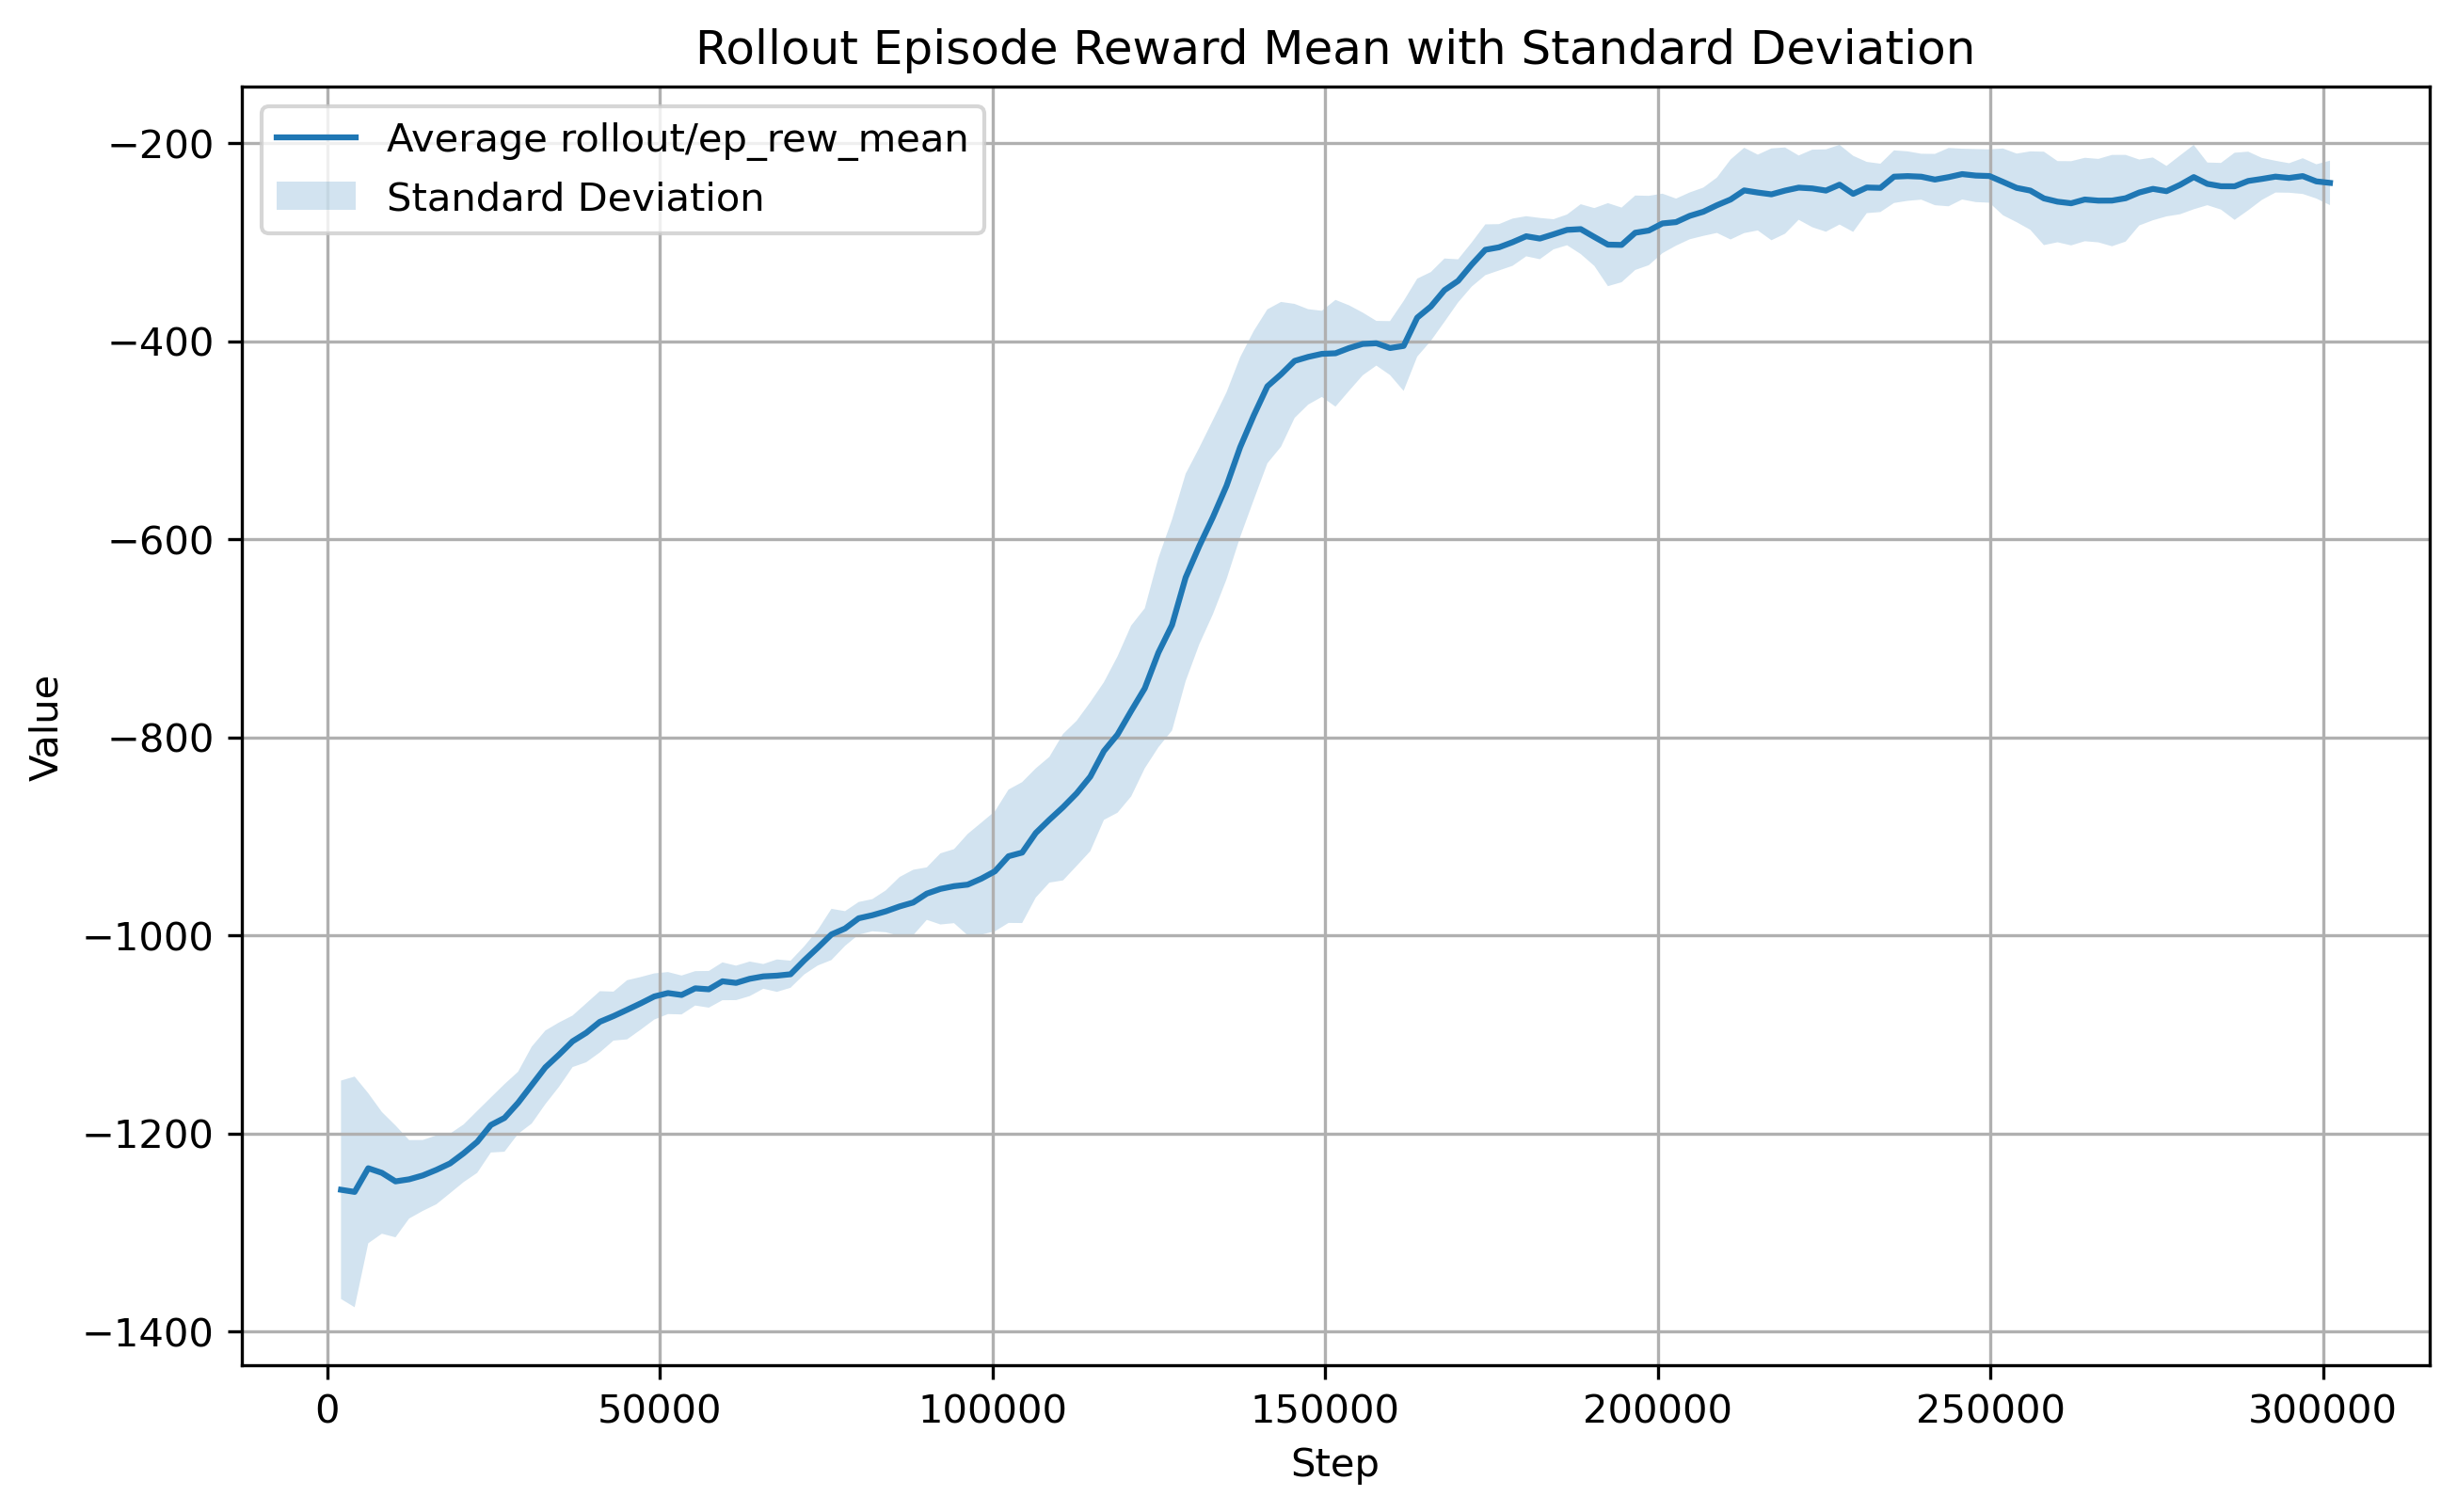

In [11]:
# 设置实验数量
exp_num = 5
scalar_tag = 'rollout/ep_rew_mean'

# 初始化存储所有实验数据的列表
all_values = []

# 读取每个实验的数据
for expId in range(exp_num):
    log_dir = "H_ENV_Model_Pen/Test2_MixedEnv_Exp_" + str(expId) + "/TRPO_1"
    steps, values = read_tensorboard_scalars(log_dir, scalar_tag)
    all_values.append(values)

# 将所有实验的值转换为NumPy数组以便于计算
all_values = np.array(all_values)

# 计算每个步数上的平均值和标准差
mean_values = np.mean(all_values, axis=0)
std_values = np.std(all_values, axis=0)

# 打印最终步数的均值和方差
final_mean = mean_values[-1]
final_std = std_values[-1]
print(f'Final Mean Value: {final_mean:.2f}')
print(f'Final Standard Deviation: {final_std:.2f}')

# 绘制图表
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(steps, mean_values, label='Average rollout/ep_rew_mean')
plt.fill_between(steps, mean_values - std_values, mean_values + std_values, alpha=0.2, label='Standard Deviation')
plt.xlabel('Step')
plt.ylabel('Value')
plt.title('Rollout Episode Reward Mean with Standard Deviation')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
# 设置实验数量
exp_num = 3
env_id = 0
scalar_tag = 'rollout/ep_rew_mean'

# 初始化存储所有实验数据的列表
all_values = []

# 读取每个实验的数据
for expId in range(exp_num):
    log_dir ="ModelFree_"+ str(expId) +"_env_"+ str(env_id) + "/TRPO_1"
    print(log_dir)
    steps, values = read_tensorboard_scalars(log_dir, scalar_tag)
    all_values.append(values)

# 将所有实验的值转换为NumPy数组以便于计算
all_values = np.array(all_values)

# 计算每个步数上的平均值和标准差
mean_values = np.mean(all_values, axis=0)
std_values = np.std(all_values, axis=0)

# 使用matplotlib绘制图表
plt.figure(figsize=(10, 6),dpi=300)
plt.plot(steps, mean_values, label='Average rollout/ep_rew_mean')
plt.fill_between(steps, mean_values - std_values, mean_values + std_values, alpha=0.2, label='Standard Deviation')
plt.xlabel('Step')
plt.ylabel('Value')
plt.title('Rollout Episode Reward Mean with Standard Deviation')
plt.legend()
plt.grid(True)
plt.show()

ModelFree_0_env_0/TRPO_1


DirectoryDeletedError: Directory ModelFree_0_env_0/TRPO_1 has been permanently deleted

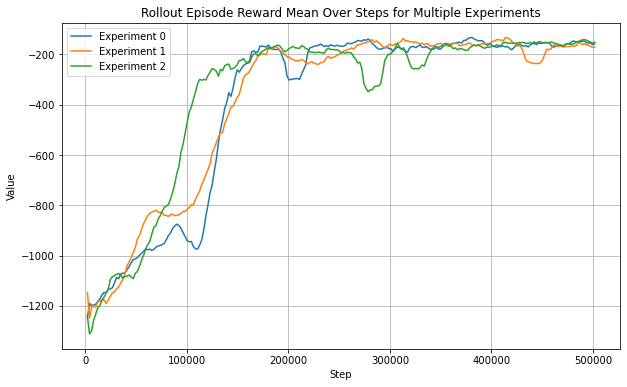

In [8]:
# 设置实验数量
exp_num = 3
scalar_tag = 'rollout/ep_rew_mean'

# 创建一个图形对象
plt.figure(figsize=(10, 6))

# 读取每个实验的数据并绘制到同一张图上
for expId in range(exp_num):
    log_dir = "H_ENV_Model_Pen/Test2_Emb_MixedEnv_Exp_" + str(expId) + "/TRPO_1"
    steps, values = read_tensorboard_scalars(log_dir, scalar_tag)
    plt.plot(steps, values, label=f'Experiment {expId}')

# 设置图形标签和标题
plt.xlabel('Step')
plt.ylabel('Value')
plt.title('Rollout Episode Reward Mean Over Steps for Multiple Experiments')
plt.legend()
plt.grid(True)

# 显示图形
plt.show()

In [16]:
# 设置实验数量
exp_num = 3
scalar_tag = 'rollout/ep_rew_mean'

# 初始化存储所有实验数据的列表
all_values = []

# 读取每个实验的数据
for expId in range(exp_num):
    log_dir = "H_ENV_Model_Pen/Test2_Emb_MixedEnv_Exp_" + str(expId) + "/TRPO_1"
    steps, values = read_tensorboard_scalars(log_dir, scalar_tag)
    all_values.append(values)

# 将所有实验的值转换为NumPy数组以便于计算
all_values = np.array(all_values)

# 计算每个步数上的平均值和标准差
mean_values = np.mean(all_values, axis=0)
std_values = np.std(all_values, axis=0)

# 打印最终步数的均值和方差
final_mean = mean_values[-1]
final_std = std_values[-1]
print(f'Final Mean Value: {final_mean:.2f}')
print(f'Final Standard Deviation: {final_std:.2f}')

# 绘制图表
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(steps, mean_values, label='Average rollout/ep_rew_mean')
plt.fill_between(steps, mean_values - std_values, mean_values + std_values, alpha=0.2, label='Standard Deviation')
plt.xlabel('Step')
plt.ylabel('Value')
plt.title('Rollout Episode Reward Mean with Standard Deviation')
plt.legend()
plt.grid(True)
plt.show()

TypeError: unsupported operand type(s) for +: 'ellipsis' and 'ellipsis'

In [15]:
import numpy as np
import matplotlib.pyplot as plt

exp_num = 3
scalar_tag = 'rollout/ep_rew_mean'

# 初始化存储所有实验数据的列表
embedding_values = []
baseline_values = []


# 读取每个实验的数据
for expId in range(exp_num):
    # 读取Embedding数据
    emb_log_dir = "H_ENV_Model_Pen/Test2_Emb_MixedEnv_Exp_" + str(expId) + "/TRPO_1"
    steps_embedding, emb_values = read_tensorboard_scalars(emb_log_dir, scalar_tag)
    embedding_values.append(emb_values)

    # 读取Baseline数据
    base_log_dir = "H_ENV_Model_Pen/Test2_MixedEnv_Exp_" + str(expId) + "/TRPO_1"
    steps_base, base_values = read_tensorboard_scalars(base_log_dir, scalar_tag)
    baseline_values.append(base_values)

# 将所有实验的值转换为NumPy数组以便于计算
embedding_values = np.array(embedding_values)
baseline_values = np.array(baseline_values)

# 计算每个步数上的平均值和标准差
embedding_mean_values = np.mean(embedding_values, axis=0)
embedding_std_values = np.std(embedding_values, axis=0)

baseline_mean_values = np.mean(baseline_values, axis=0)
baseline_std_values = np.std(baseline_values, axis=0)

# 绘制图表
plt.figure(figsize=(10, 6), dpi=300)

# 绘制Embedding数据
plt.plot(steps_embedding, embedding_mean_values, label='Embedding rollout/ep_rew_mean', color='blue')
plt.fill_between(steps, embedding_mean_values - embedding_std_values, embedding_mean_values + embedding_std_values, alpha=0.2, color='blue')

# 绘制Baseline数据
plt.plot(steps, baseline_mean_values, label='Baseline rollout/ep_rew_mean', color='orange')
plt.fill_between(steps_base, baseline_mean_values - baseline_std_values, baseline_mean_values + baseline_std_values, alpha=0.2, color='orange')

# 图表设置
plt.xlabel('Step')
plt.ylabel('Value')
plt.title('Rollout Episode Reward Mean Comparison')
plt.legend()
plt.grid(True)
plt.show()


TypeError: unsupported operand type(s) for +: 'ellipsis' and 'ellipsis'

TypeError: unsupported operand type(s) for +: 'ellipsis' and 'ellipsis'